# 深層学習入門(ニューラルネットワーク系) - Chapter2

- **[2.1 畳み込みニューラルネットワーク（CNN）](#2.1-畳み込みニューラルネットワーク（CNN）)**
    - **[2.1.1 畳み込みニューラルネットワーク（CNN）の概要](#2.1.1-畳み込みニューラルネットワーク（CNN）の概要)**
    - **[2.1.2 畳み込み層](#2.1.2-畳み込み層)**
    - **[2.1.3 プーリング層](#2.1.3-プーリング層)**
<br><br>
- **[2.2 Kerasの導入](#2.2-Kerasの導入)**
    - **[2.2.1 Kerasの概要](#2.2.1-Kerasの概要)**
    - **[2.2.2 MNIST, Cifar10データ](#2.2.2-MNIST,-Cifar10データ)**
<br><br>
- **[2.3 各種層の実装](#2.3-各種層の実装)**
    - **[2.3.1 Sequentialモデル](#2.3.1-Sequentialモデル)**
    - **[2.3.2 全結合層](#2.3.2-全結合層)**
    - **[2.3.3 畳み込み層](#2.3.3-畳み込み層)**
    - **[2.3.4 プーリング層](#2.3.4-プーリング層)**
    - **[2.3.5 平坦化層](#2.3.5-平坦化層)**
<br><br>
- **[2.4 モデルの運用](#2.4-モデルの学習)**
    - **[2.4.1 モデルの定義](#2.4.1-モデルの定義)**
    - **[2.4.2 モデルのコンパイル・学習](#2.4.2-モデルのコンパイル・学習)**
    - **[2.4.3 汎化精度の評価](#2.4.3-汎化精度の評価)**
    - **[2.4.4 モデルのセーブとロード](#2.4.4-モデルのセーブとロード)**
<br><br>
- **[2.5 添削問題](#2.5-添削問題)**

***

## 2.1 畳み込みニューラルネットワーク（CNN）

### 2.1.1 畳み込みニューラルネットワーク（CNN）の概要

このセクションでは、CNN（Convolutional Neural Network、畳み込みニューラルネットワーク）という深層学習手法について説明します。  
このニューラルネットは人間の視覚野によく似た構造を持っているのが特徴で、主に画像処理で高い精度を出しています。  
また、ディープラーニングが注目されるきっかけとなった手法でもあり、たくさんの研究がされてきました。  
直接的な画像認識だけでなく、スペクトログラムとよばれる時系列データの周波数と時間の情報を1枚の画像にしたものに対して用いることで、音声認識タクスにおいて、高い精度が出ているという報告もあります。 

CNNは多層パーセプトロンとは異なり複数の種類の層から構成されます。   
前のChapterで実装していたのは多層パーセプトロン(MLP; Multiple Layer Perceptron) のモデルです。 このモデルは1次元の入力を受け取ります。   
そのためMLPは構造上、画素の隣接関係などは無視してしまいます。  
これに対し、CNNは画像を2次元のまま入力し次に説明する畳み込みやプーリングを行うため、画像の隣接関係の情報も損失せずに学習できます。  
そのためCNNはMLPモデルよりも精度が高くなると予想できます。

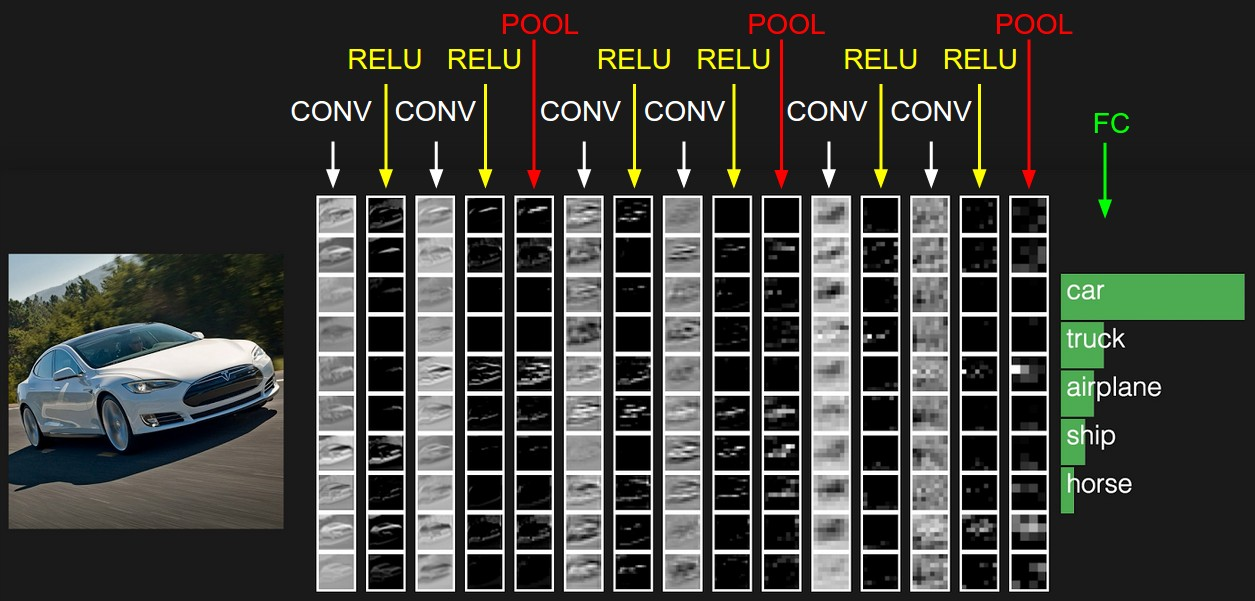

出典：http://cs231n.github.io/convolutional-networks/

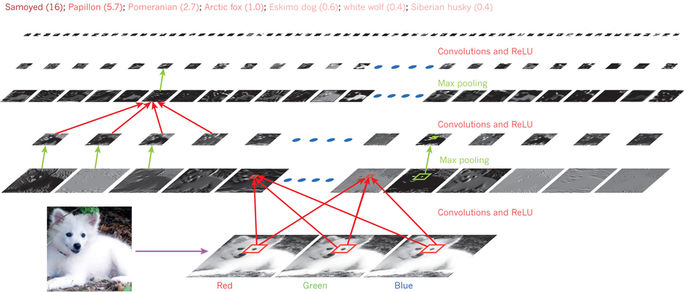

出典：https://www.nature.com/articles/nature14539

***

### 2.1.2 畳み込み層

CNNは畳み込み層とプーリング層から成ります。まずは畳み込み層について説明します。  

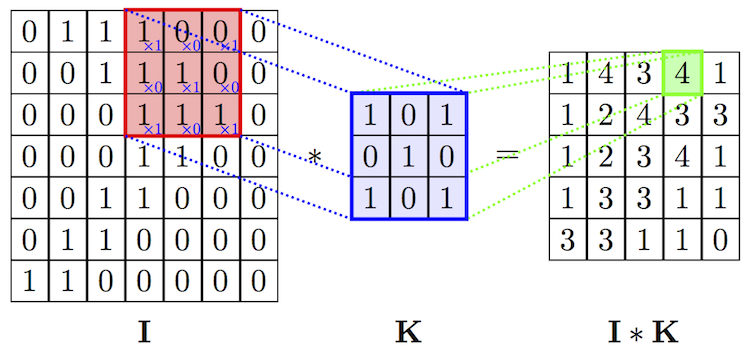

出典：https://cambridgespark.com/content/tutorials/convolutional-neural-networks-with-keras/index.html

畳み込み層では上の図のように、画像に対してフィルタを適用して出力を計算します。
このフィルタ自体を学習するのが畳み込み層の学習です。

***

### 2.1.3 プーリング層

次に、プーリング層について説明します。  
プーリングにはMaxプーリングやAverageプーリングがあります。  
下図はMaxプーリングの例です。
畳み込みやプーリングの際に、見ている部分を動かす幅をストライドと言います。 詳しくは次節で説明します。

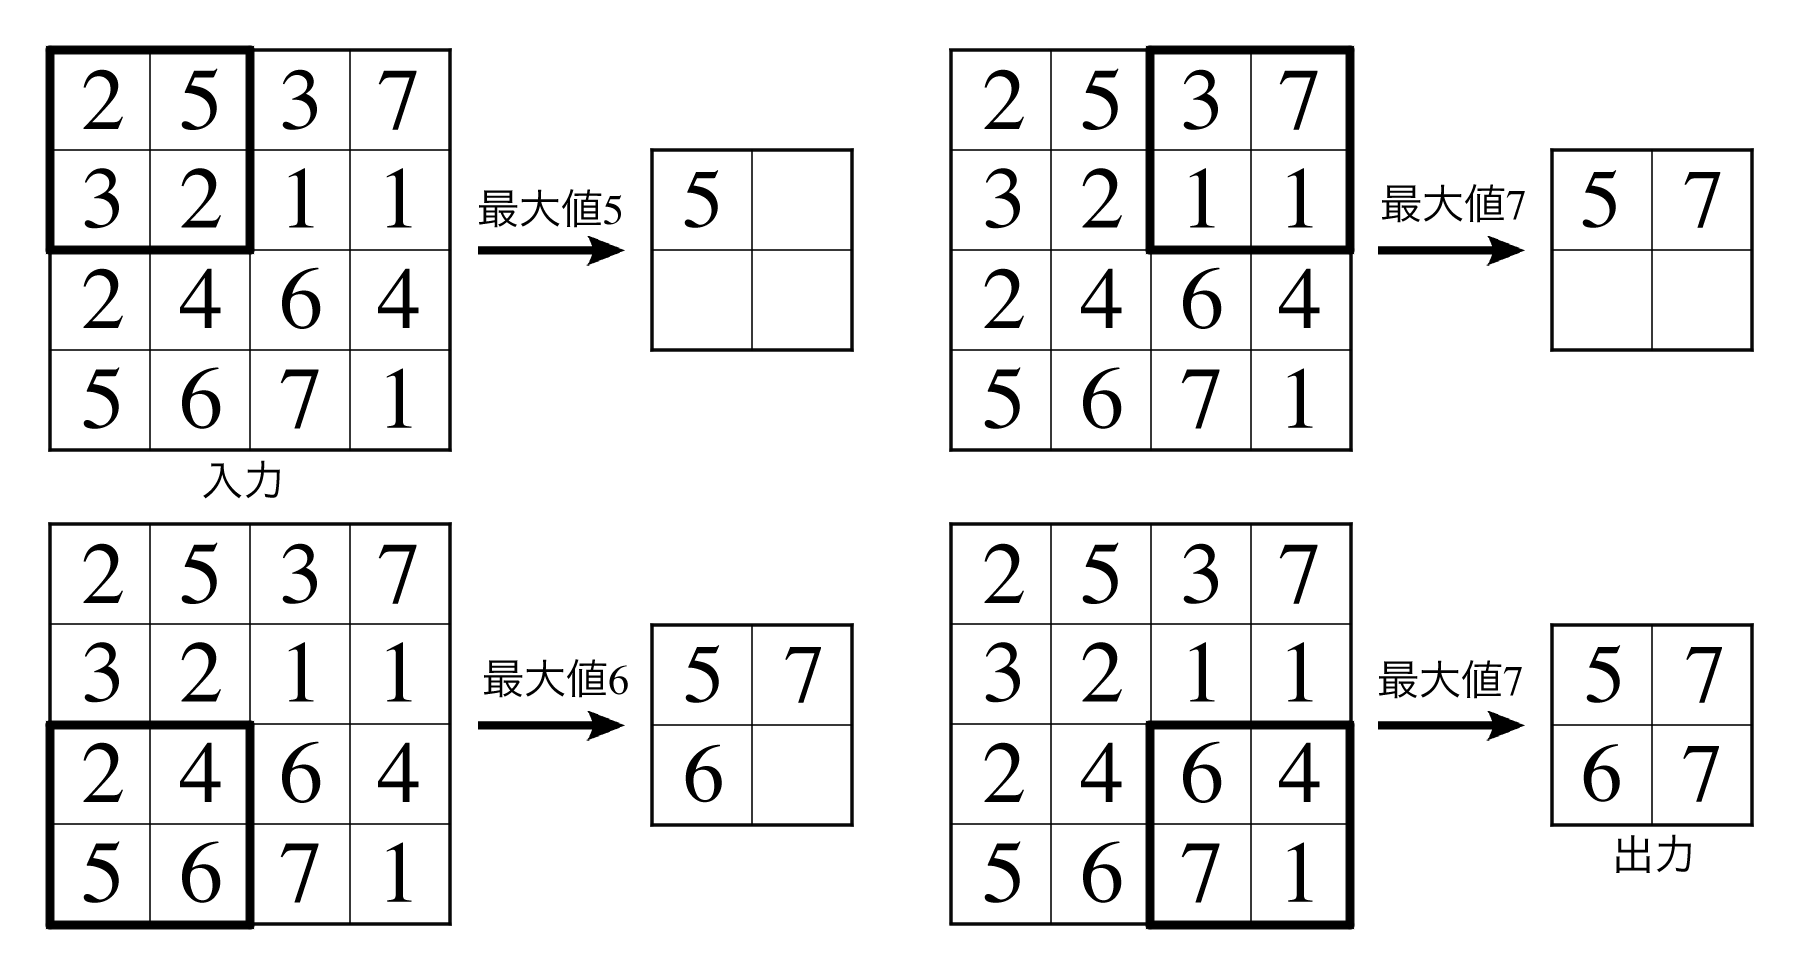

Maxプーリングではこのように、範囲内の最大値を計算します。  
次に、Averageプーリングです。

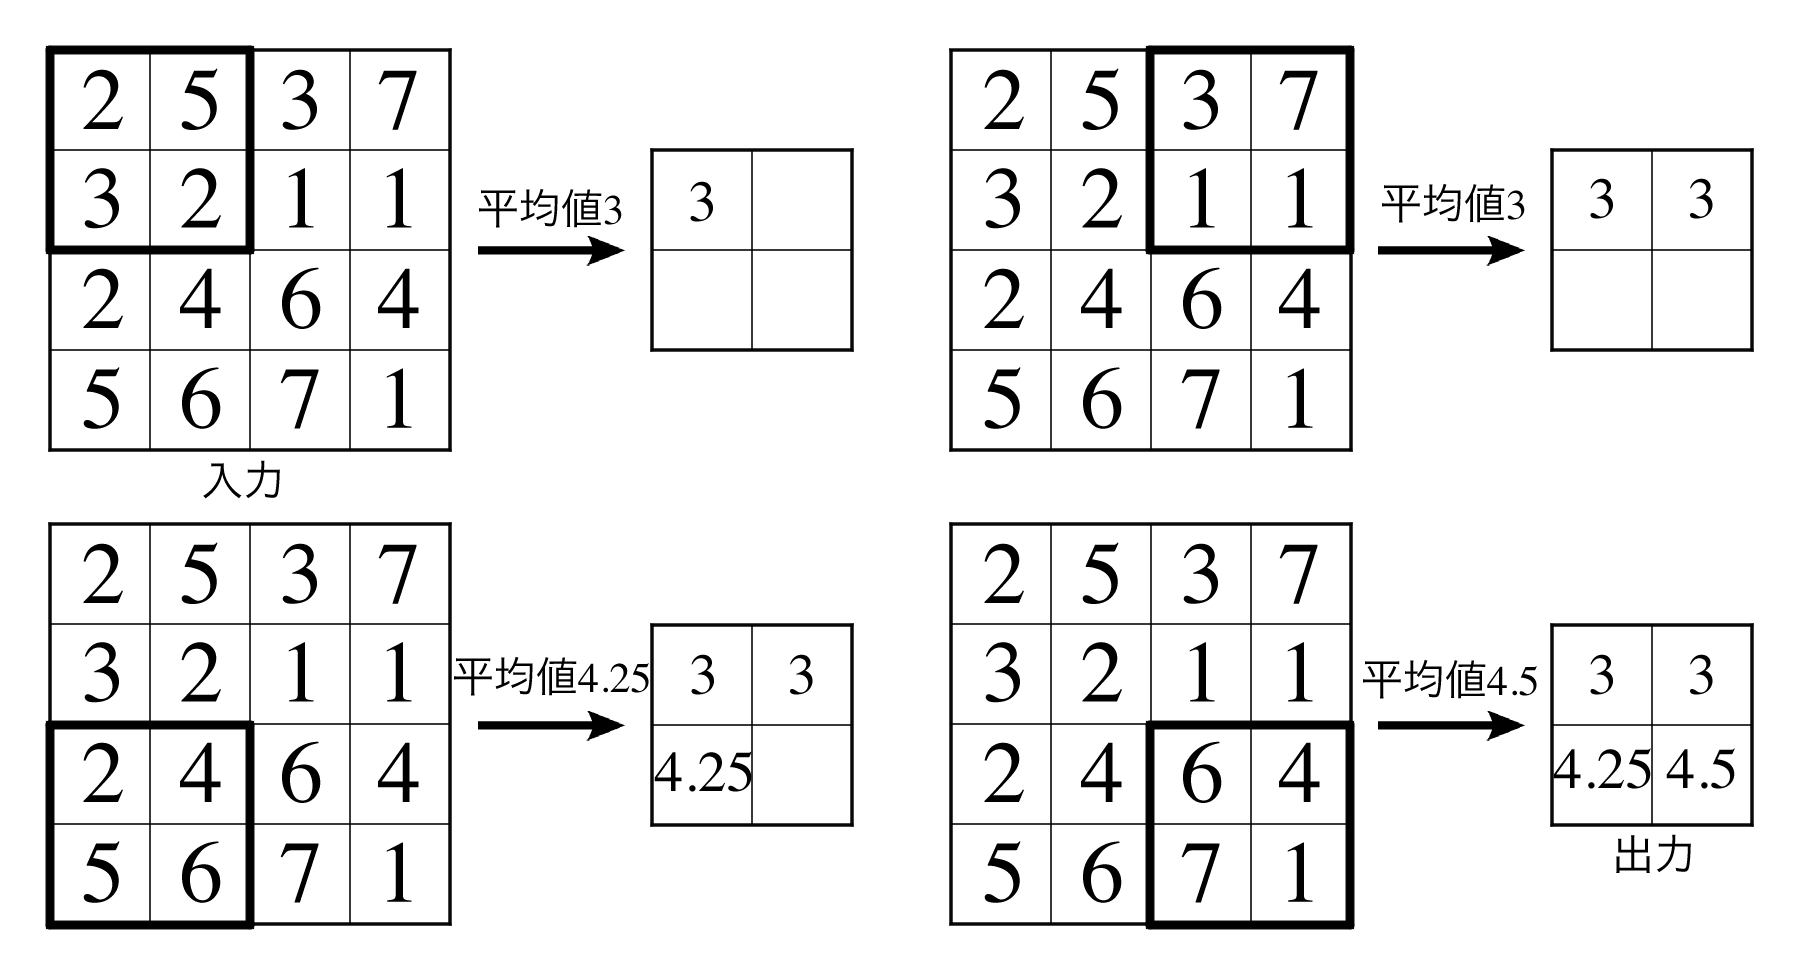

Averageプーリングでは、範囲内の平均値を計算します。

これらの方法により、画像の平行移動や回転によって変化しにくいロバストな出力が得られます。

#### 問題

下のような画素値をもつ画像のMaxプーリング適用後の画像を考えてください。

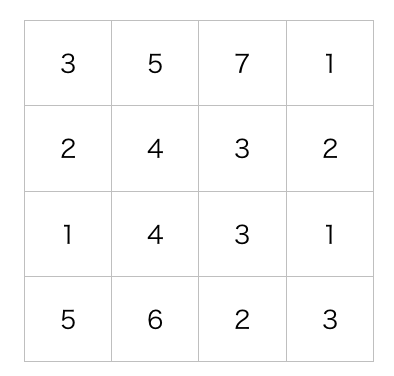

#### 解答

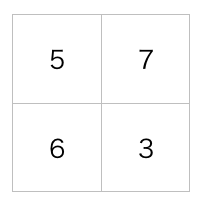

***

## 2.2 Kerasの導入

### 2.2.1 Kerasの概要

KarasはTheanoやTensorFlowといった機械学習のライブラリのラッパーです。  
これ以降のディープニューラルネットワークのモデルの作成・学習は[Keras](https://keras.io/ja/)というライブラリを使用します。

***

### 2.2.2 MNIST, Cifar10データ

MNISTは、0から9までの手書き数字の画像データセットで、それぞれの画像が教師データによりラベル付けされています。  
Cifar10データは飛行機、自動車、鳥、猫、鹿、犬、カエル、馬、船、トラックの10種類の画像から成るデータセットで、MNIST同様、すべての画像に教師ラベルがついています。
そして、この2つのデータセットを簡単にロードできる関数がKerasに用意されています。  
Kerasでロードした場合、MNISTの学習データは60000個、Cifar10の学習データは50000個あります。   
これらのデータセットは画像認識の性能テストやチュートリアルでよく用いられるのでどのようなデータか理解しておいてください。

#### 問題

以下のプログラムを埋めてMNIST、Cifar10データを表示し、どのような画像が含まれているか確認してください。
データのロードには少し時間がかかるかもしれません。

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10, mnist
from sklearn.datasets import fetch_mldata

% matplotlib inline

# MNISTデータの取得,
(X_train, y_train), (X_test, y_test) = mnist.load_data()

for i in range(10):
    plt.subplot(2, 5, i + 1)
    #----------------------------
    # ここを埋めてください
    #----------------------------
plt.show()

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

for i in range(10):
    plt.subplot(2, 5, i + 1)
    #----------------------------
    # ここを埋めてください
    #----------------------------
plt.show()

#### 解答例

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10, mnist
from sklearn.datasets import fetch_mldata

% matplotlib inline

# MNISTデータの取得,
(X_train, y_train), (X_test, y_test) = mnist.load_data()

for i in range(10):
    plt.subplot(2, 5, i + 1)
    #----------------------------
    plt.imshow(X_train[i * 1000], cmap="gray")
    #----------------------------
plt.show()

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

for i in range(10):
    plt.subplot(2, 5, i + 1)
    #----------------------------
    plt.imshow(X_train[i * 1000], cmap="gray")
    #----------------------------
plt.show()

***

## 2.3 各種層の実装

### 2.3.1 Sequentialモデル

Kerasでのモデルの定義方法は2通りあり、ここではSequentialモデルを使用します。
Sequentialモデルによるモデルの定義は以下のように行います。
```python
model = Sequential()
model.add(層1)
model.add(層2)
︙
```

このチャプターで使用する層は、  
Conv2D、MaxPooling2D、Dense、Activation、Flattenです。
また、Kerasには日本語のドキュメントがあるため、層の詳しい説明やこのチャプターで説明しない層に興味がある場合は[こちら](https://keras.io/ja/)を参照してください。

***

### 2.3.2 全結合層

全結合層は入力と出力がすべて繋がっているような層です。  
以下のモデルだと、全結合層を2回使って出力を得ます。

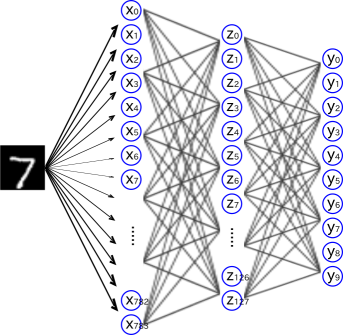

Kerasでは以下のように定義できます。
```python
    Dense(units, input_dim=784)
```
unitsは出力層のニューロン(ユニット)の数です。  
input_shapeは入力のサイズで、上の例では784次元のデータが入力されます。  
最初の層以外はinput_dimを指定する必要はなく、省略できます。  
`input_dim=784`の代わりに`input_shape=(784, )`としても等価です。(`input_dim`はintを, `input_shape`はタプルを指定します)  
`input_shape`も同様に最初の層以外は省略できます。また、これはConv2D、MaxPooling2Dなどの他の層でも同じです。

#### 問題

Sequentialモデルを用いて、全結合層を3つ重ねたモデルを構成してください。  
ただし、入力は784次元で、各層の出力はそれぞれ256、128、10としてください。  
また、それぞれの層のインポート方法も確認してください。

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
#---------------------------
#        ここを書いて下さい       
#---------------------------

#### 解答例

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
#---------------------------
model.add(Dense(256, input_dim=784))
model.add(Dense(128))
model.add(Dense(10))
#---------------------------

***

### 2.3.3 畳み込み層

畳み込み層は以下のように定義します。
```python
Conv2D(filters = 32, kernel_size=(2, 2), strides=(1, 1), padding="same", input_shape=(28, 28, 3))
```
input_shapeは入力される画像の形状で、上の例では$28\times28$のRGB(3チャネル)の画像を入力できます。 
filtersはフィルタの数、kernel_sizeはそれぞれのフィルタのサイズ、stridesは畳み込み演算時のステップ幅です。
paddingは"same"のとき、入力サイズと同じサイズの出力になるようにパディングを行い、"valid"のときは行いません。

***

### 2.3.4 プーリング層

プーリング層は以下のように定義します。
```python
MaxPooling2D(pool_size=(2, 2), strides=None)
```
pool_sizeはプールする範囲のサイズ、stridesはプーリングを行うステップ幅です。

#### 問題

28x28 のRGB画像を入力できる、畳み込みニューラルネットワークをSequentialモデルで構成してください。  
ただし、層の構造は、"畳み込み、プーリング、畳込み、プーリング"です。  
また、それぞれの層のimport方法も確認してください。

In [ ]:
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential

model = Sequential()
#---------------------------
#        ここを書いて下さい       
#---------------------------

#### 解答例

In [ ]:
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential

model = Sequential()
#---------------------------
model.add(Conv2D(input_shape=(28, 28, 3), filters=32, kernel_size=(2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
#---------------------------

***

### 2.3.5 平坦化層

この層はConv2DやMaxPooling2Dなどの1次元でない出力をする層の出力を全結合層のような1次元の入力を受け取る層に入力する際に使います。平坦化層には指定する引数はありません。

#### 問題

下図のようなモデルを構成してください。  
ただし、層の構造は、"畳み込み、プーリング、畳込み、プーリング、平坦化、全結合、10次元の出力"です。 

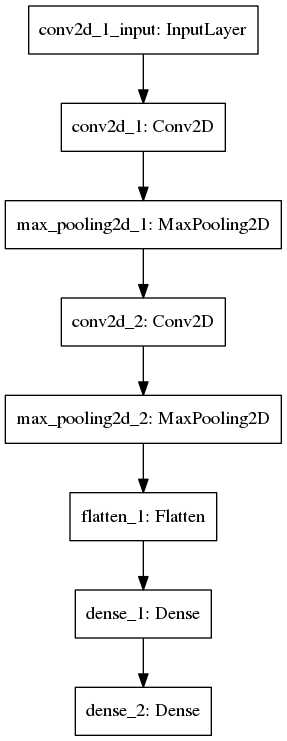

In [ ]:
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential
"
model = Sequential()
#---------------------------
#        ここを書いて下さい       
#---------------------------

#### 解答例

In [ ]:
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential

model = Sequential()
#---------------------------
model.add(Conv2D(input_shape=(28, 28, 3), filters=16, kernel_size=(2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(10))
#---------------------------

***

## 2.4 モデルの学習

### 2.4.1 モデルの定義

層の定義は前セクションで行ったとおりです。  
出力の形は2クラス分類では2、10クラス分類では10のように決まっているため, `Dense(2)`や`Dense(10)`のように固定になります。  
しかし、入力と出力の間の層(隠れ層)のユニット数は決まっておらず、このパラメータは学習されるものでもありません。  
このようなパラメータをハイパーパラメータといいます。  
同様に、隠れ層の数もハイパーパラメータです。

チャプター1で学んだように多層パーセプトロンでは各層の出力を活性化関数に入力します。
Kerasでは活性化関数を他の層と同じように定義できます。
例えば、sigmoid関数では次のように実装します。
```python
Activation('sigmoid')
```
Activationに与えられる文字列としては、'sigmoid'、'relu'、'softmax'などがあります。

#### 問題

784次元の入力を受け取り、10次元の出力をする全結合層のみから成るモデルを構成してください。  
ただし、隠れ層は2つでそれぞれの出力は256次元、128次元、として活性化関数はどちらもsigmoidを用い、出力層のみ活性化関数をsoftmax関数にしてください。
このモデルを多層パーセプトロンモデルといいます。

In [ ]:
from keras.datasets import mnist
from keras.layers import Activation, Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

model = Sequential()
#---------------------------
#        ここを書いて下さい       
#---------------------------

#### 解答例

In [ ]:
from keras.datasets import mnist
from keras.layers import Activation, Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

model = Sequential()
#---------------------------
model.add(Dense(256, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))
#---------------------------

***

### 2.4.2 モデルのコンパイル・学習

モデルを定義後、学習率の変更方法や損失関数をどうするか、表示する精度指標を何にするかなどを指定してコンパイルする必要があります。  
コンパイルとは、高水準のプログラミング言語で書かれたソースコードを解析し、コンピュータが直接実行可能な機械語に予め変換することです。  
コンパイルは以下のように行なえます。
```python
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
```
optimizerが学習率の変更方法で他には、SGD、RMSprop、Adagrad、Adadelta、Adamなどがあります。  
lossは損失関数(誤差関数)です。平均二乗誤差(mean_squared_error)や交差エントロピー(categorical_crossentropy、binary_crossentropy)などがあります。  
metricsはモデルの性能評価指標です。

モデルの学習は以下のように行います。
```python
model.fit(X_train, y_train, batch_size=32, epochs=10)
```
X_train、y_trainは、学習用データの入力と教師です。 batch_sizeはバッチ学習を行う際の1度に使うデータの数です。  
バッチ学習とは、データをすべて使うのではなく一部を使って計算し、その結果に基づいてパラメータを更新するという一連の作業を全データに渡って行う方法です。  
epochsは何エポック学習するかを指定する引数です。エポックとは全データを使った学習を何回行うかです。  
例えば、全部で256個あるデータを用いてbatch_size=32、epochs=10とすると、1エポックあたり8バッチの学習が行われ、それが10エポック分学習されます。

#### 問題

MLPでMNISTの分類モデルを実装し学習を行います。  
以下のプログラムを埋めて、モデルのコンパイル、学習を行ってください。  
ただし、optimizerはsgd、lossは平均二乗誤差、性能評価指標はaccuracyとして、バッチサイズは32、エポック数は10にしてください。

In [ ]:
from keras.datasets import mnist
from keras.layers import Activation, Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:10000]
X_test = X_test.reshape(X_test.shape[0], 784)[:10000]
y_train = to_categorical(y_train)[:10000]
y_test = to_categorical(y_test)[:10000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

#---------------------------
#        ここを書いて下さい       
#---------------------------

#### 解答例

In [ ]:
from keras.datasets import mnist
from keras.layers import Activation, Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:10000]
X_test = X_test.reshape(X_test.shape[0], 784)[:10000]
y_train = to_categorical(y_train)[:10000]
y_test = to_categorical(y_test)[:10000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

#---------------------------
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=10)
#---------------------------

***

### 2.4.3 汎化精度の評価

モデルを学習させた際、学習に用いたデータに対して良い結果を出すようになります。  
しかし、実際に用いる場合は未知のデータに対して高い精度を出してほしいです。  
このため、学習に用いるデータと性能の評価に用いるデータを分割しておき、評価用データで性能を評価します。  
このような精度を汎化精度といいます。  
Kerasでは次のようにして精度を計算します。
```python
score = model.evaluate(X_test, y_test, verbose=0)
```
X_test, y_testは評価用データの入力と教師です。  
verboseは計算過程の進捗の表示をどうするかです。0のとき表示せず、1のとき表示します。

#### 問題

プログラムを埋めて汎化精度を表示してください。

In [ ]:
from keras.datasets import mnist
from keras.layers import Activation, Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:10000]
X_test = X_test.reshape(X_test.shape[0], 784)[:10000]
y_train = to_categorical(y_train)[:10000]
y_test = to_categorical(y_test)[:10000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=5)

#---------------------------
#        ここを書いて下さい       
#---------------------------

#### 解答例

In [ ]:
from keras.datasets import mnist
from keras.layers import Activation, Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:10000]
X_test = X_test.reshape(X_test.shape[0], 784)[:10000]
y_train = to_categorical(y_train)[:10000]
y_test = to_categorical(y_test)[:10000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=5)

score = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
print('validation loss:{0[0]}\nvalidation accuracy:{0[1]}'.format(score))

***

### 2.4.4 モデルのセーブとロード

モデルを保存する際、保存したいのはモデルの構造とモデルの重み(パラメータ)です。  
以下のようにしてモデルの重みと構造を保存できます。
```python
model.save('my_model.h5')
```

.h5とはHDF5形式のファイルの拡張子で、HDF5（Hierarchical Data Format 5）は階層化されたデータ群を扱う形式です。  
これにより、my_model.hd5にモデルが保存されます。  
このモデルを読み込むときは以下のようにします。
```python
model = load_model('my_model.h5')
```

モデルの構造は以下のようにしてjson形式に変換できます。
```python
json_string = model.to_json()
```
これをjsonファイルに書き込むことで保存できます。  
jsonで保存することで、人が読み、編集できます。  
これをロードするには、`json_string`に保存したjsonファイルを読み込み、以下のようにします。
```python
model = model_from_json(json_string)
```

#### 問題

以下のプログラムを埋めてモデルの保存・読み込みを行ってください。  
また、jsonファイルの内容を表示することでモデル構造がどのように保存されるか確認してください。

In [ ]:
from keras.datasets import mnist
from keras.layers import Activation, Dense
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:10000]
X_test = X_test.reshape(X_test.shape[0], 784)[:10000]
y_train = to_categorical(y_train)[:10000]
y_test = to_categorical(y_test)[:10000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=5)

score = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
print('validation loss:{0[0]}\nvalidation accuracy:{0[1]}'.format(score))


#----------------------------
# モデルの保存
#----------------------------
print('モデル削除')
del model

#----------------------------
# モデルの読み込み
#----------------------------

# スコアが変わらないことを確認
score = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
print('validation loss:{0[0]}\nvalidation accuracy:{0[1]}'.format(score))

#----------------------------
# モデル構造をjson化
#----------------------------

print(json_string)

#### 解答例

In [ ]:
from keras.datasets import mnist
from keras.layers import Activation, Dense
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:10000]
X_test = X_test.reshape(X_test.shape[0], 784)[:10000]
y_train = to_categorical(y_train)[:10000]
y_test = to_categorical(y_test)[:10000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=5)

score = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
print('validation loss:{0[0]}\nvalidation accuracy:{0[1]}'.format(score))

model.save('my_model.h5')

print('モデル削除')
del model

model = load_model('my_model.h5')

# スコアが変わらないことを確認
score = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
print('validation loss:{0[0]}\nvalidation accuracy:{0[1]}'.format(score))

json_string = model.to_json()
print(json_string)

***

## 2.5 添削問題

#### 問題

Cifar10を用いて、これまでに作成した、MLP、CNNのモデルを実装・学習させ、精度を比較してください。  

Cifar10は$32\times32\times3$の画像です。(最後の$\times3$はRGBであるという意味)

#### ヒント

In [ ]:
from keras.datasets import mnist
from keras.layers import Activation, Dense
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:10000]
X_test = X_test.reshape(X_test.shape[0], 784)[:10000]
y_train = to_categorical(y_train)[:10000]
y_test = to_categorical(y_test)[:10000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=5)

score = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
print('validation loss:{0[0]}\nvalidation accuracy:{0[1]}'.format(score))

#### 解答例

In [ ]:
from keras.datasets import mnist
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

# データのロード
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 今回は全データのうち、学習には10000、テストには1000個のデータを使用します。
X_train = X_train[:10000].reshape(10000, 28, 28, 1)
X_test = X_test[:1000].reshape(1000, 28, 28, 1)
y_train = to_categorical(y_train)[:10000]
y_test = to_categorical(y_test)[:1000]


# モデルの定義
model = Sequential()
model.add(Conv2D(input_shape=(28, 28, 1), filters=32,
                 kernel_size=(2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(
    2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

# コンパイル
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# 学習
model.fit(X_train, y_train, batch_size=32, epochs=5)

# 汎化制度の評価・表示
score = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
print('validation loss:{0[0]}\nvalidation accuracy:{0[1]}'.format(score))